(32561, 124) (32561,)
(16281, 124) (16281,)
SGD_loss = 0.693147
SGD_loss = 0.643388
SGD_loss = 0.594035
SGD_loss = 0.583350
SGD_loss = 0.567945
SGD_loss = 0.555708
SGD_loss = 0.533627
SGD_loss = 0.525200
SGD_loss = 0.521523
SGD_loss = 0.515151
SGD_loss = 0.511122
SGD_loss = 0.510531
SGD_loss = 0.505182
SGD_loss = 0.502006
SGD_loss = 0.497745
SGD_loss = 0.494260
SGD_loss = 0.491343
SGD_loss = 0.487271
SGD_loss = 0.485075
SGD_loss = 0.481508
SGD_loss = 0.480145
SGD_loss = 0.476491
SGD_loss = 0.474170
SGD_loss = 0.473759
SGD_loss = 0.471147
SGD_loss = 0.468382
SGD_loss = 0.465443
SGD_loss = 0.463186
SGD_loss = 0.461230
SGD_loss = 0.459584
SGD_loss = 0.456835
SGD_loss = 0.455721
SGD_loss = 0.453541
SGD_loss = 0.450775
SGD_loss = 0.449222
SGD_loss = 0.447092
SGD_loss = 0.445563
SGD_loss = 0.444477
SGD_loss = 0.445834
SGD_loss = 0.441806
SGD_loss = 0.439413
SGD_loss = 0.440332
SGD_loss = 0.439580
SGD_loss = 0.439163
SGD_loss = 0.440109
SGD_loss = 0.438093
SGD_loss = 0.433193
SGD_loss = 0.432

RMSProp_loss = 0.510507
RMSProp_loss = 0.494345
RMSProp_loss = 0.486265
RMSProp_loss = 0.479702
RMSProp_loss = 0.479305
RMSProp_loss = 0.472066
RMSProp_loss = 0.466727
RMSProp_loss = 0.463622
RMSProp_loss = 0.457795
RMSProp_loss = 0.456626
RMSProp_loss = 0.459704
RMSProp_loss = 0.459837
RMSProp_loss = 0.450210
RMSProp_loss = 0.444832
RMSProp_loss = 0.440862
RMSProp_loss = 0.439269
RMSProp_loss = 0.436597
RMSProp_loss = 0.432084
RMSProp_loss = 0.429289
RMSProp_loss = 0.425912
RMSProp_loss = 0.423991
RMSProp_loss = 0.419674
RMSProp_loss = 0.417694
RMSProp_loss = 0.414734
RMSProp_loss = 0.415183
RMSProp_loss = 0.418325
RMSProp_loss = 0.414568
RMSProp_loss = 0.407705
RMSProp_loss = 0.406157
RMSProp_loss = 0.404452
RMSProp_loss = 0.401141
RMSProp_loss = 0.403308
RMSProp_loss = 0.403109
RMSProp_loss = 0.394864
RMSProp_loss = 0.391735
RMSProp_loss = 0.391106
RMSProp_loss = 0.389871
RMSProp_loss = 0.387668
RMSProp_loss = 0.385766
RMSProp_loss = 0.385510
RMSProp_loss = 0.384215
RMSProp_loss = 0

AdaDelta_loss = 0.351792
AdaDelta_loss = 0.351891
AdaDelta_loss = 0.350841
AdaDelta_loss = 0.350567
AdaDelta_loss = 0.352399
AdaDelta_loss = 0.352747
AdaDelta_loss = 0.349018
AdaDelta_loss = 0.351312
AdaDelta_loss = 0.352706
AdaDelta_loss = 0.348263
AdaDelta_loss = 0.347491
AdaDelta_loss = 0.345362
AdaDelta_loss = 0.344730
AdaDelta_loss = 0.345085
AdaDelta_loss = 0.346167
AdaDelta_loss = 0.346363
AdaDelta_loss = 0.345104
AdaDelta_loss = 0.344419
AdaDelta_loss = 0.346589
AdaDelta_loss = 0.346295
AdaDelta_loss = 0.344888
AdaDelta_loss = 0.346595
AdaDelta_loss = 0.345975
AdaDelta_loss = 0.343815
AdaDelta_loss = 0.344719
AdaDelta_loss = 0.343119
AdaDelta_loss = 0.343839
AdaDelta_loss = 0.344248
AdaDelta_loss = 0.345040
AdaDelta_loss = 0.342568
AdaDelta_loss = 0.341782
AdaDelta_loss = 0.341528
AdaDelta_loss = 0.341787
AdaDelta_loss = 0.340400
AdaDelta_loss = 0.339936
AdaDelta_loss = 0.340003
AdaDelta_loss = 0.344172
AdaDelta_loss = 0.342849
AdaDelta_loss = 0.346539
AdaDelta_loss = 0.349758


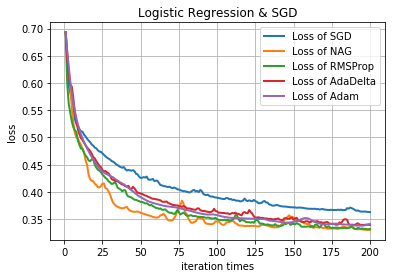

In [4]:
# coding=utf-8
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file

def loadDataSet():
    # 读取数据
    X_train,y_train=load_svmlight_file("a9a.txt")
    X_validation, y_validation = load_svmlight_file("a9a.t")
    #将稀疏矩阵转化为完整特征矩阵
    X_train = X_train.todense()
    X_validation = X_validation.todense()
    #对X增加一列全为1,验证集需要先补0
    X_train = np.column_stack((X_train, np.ones(y_train.shape[0])))
    X_validation = np.column_stack((X_validation, np.zeros(y_validation.shape[0])))
    X_validation = np.column_stack((X_validation, np.ones(y_validation.shape[0])))
    #对y所有的-1用0代替
    y_train = np.array(list(map((lambda x: 0 if x <= 0 else 1), y_train)))
    y_validation = np.array(list(map((lambda x: 0 if x <= 0 else 1), y_validation)))
    print(X_train.shape,y_train.shape)
    print(X_validation.shape,y_validation.shape)
    return X_train, X_validation, y_train, y_validation

def sigmoid(inX):
    return 1.0/(1+math.exp(-inX))

def loss_function(X_data,y_data,w):
    loss = 0.0
    num = y_data.shape[0]
    for i in range(num):
        y = sigmoid(np.dot(X_data[i][0].getA()[0], w))
        loss += - (y_data[i] * math.log(y) + (1 - y_data[i]) * math.log(1 - y)) / num
    return loss

def stocGradDescent(epoch,X_train,X_validation,y_train,y_validation,opt):
    num = y_train.shape[0]    #样本数量
    batch = int(5000/epoch)
    # 线性模型参数全零初始化
    w = np.zeros(X_train.shape[1])
    v = np.zeros(X_train.shape[1],dtype=np.float)
    G = np.zeros(X_train.shape[1], dtype=np.float)
    dx = np.zeros(X_train.shape[1], dtype=np.float)
    m = np.zeros(X_train.shape[1],dtype=np.float)
    t = 0
    losss = []

    # 迭代次maxCycles次
    for n in range(epoch):
        grad_w = np.zeros(X_train.shape[1])
        loss = loss_function(X_validation, y_validation, w)
        for i in range(batch):
            index = np.random.randint(0,num-1)
            y = sigmoid(np.dot( X_train[index][0].getA()[0], w))
            grad_w += ( y - y_train[index] ) * X_train[index][0].getA()[0] / batch

        #更新模型参数
        if ( opt == 'SGD'):
            updates = SGD(w, grad_w)
        elif ( opt == 'NAG'):
            updates, v = NAG(w, grad_w, v)
        elif ( opt == 'RMSProp'):
            updates, G = RMSProp(w, grad_w, G)
        elif ( opt == 'AdaDelta'):
            updates, G, dx= AdaDelta(w, grad_w, G, dx)
        elif ( opt == 'Adam'):
            updates, G, m, t = Adam(w, grad_w, G, m, t)

        for i in range(len(w)):
            w[i] = updates[i][1]
        losss.append(loss)
        print("%s_loss = %f" % (opt, loss))
    return losss

def SGD(parameters, gradients, eta=0.1):
    """
    Basic Mini-batch Stochastic Gradient Descent
    """
    updates = [(parameters[i], parameters[i] - eta * gradients[i])
               for i in range(len(parameters))]
    return updates

def NAG(parameters, gradients, v, eta=0.05, gamma=.9):
    """
    Nesterov accelerated gradient
    """
    para_num = len(parameters)
    v_prev = v
    v = np.array([gamma * v[i] + eta * gradients[i] for i in range(para_num)])
    updates = [(parameters[i], parameters[i] - ( - gamma * v_prev[i] + ( 1 + gamma ) * v[i]))
                    for i in range(para_num)]

    return updates, v

def RMSProp(parameters, gradients, G, eta=.01, gamma=0.9, epsilon=1e-8):
    """
    RMSProp: Divide the gradient by a running average of its recent magnitude
    """
    para_num = len(parameters)
    G = np.array([gamma * G[i] + (1 - gamma) * (gradients[i])**2 for i in range(para_num)])
    updates = [(parameters[i], parameters[i] - eta * gradients[i] / math.sqrt(G[i] + epsilon))
                for i in range(para_num)]
    return updates, G

def AdaDelta(parameters, gradients, G, dx, gamma=0.95, epsilon=1e-5):
    """
    AdaDelta: An Adaptive Learning Rate
    """
    para_num = len(parameters)
    G = np.array([gamma * G[i] + (1 - gamma) * (gradients[i]**2) for i in range(para_num)])
    dw = [math.sqrt(dx[i] + epsilon) / math.sqrt(G[i] + epsilon) * gradients[i] for i in range(para_num)]
    updates = [(parameters[i], parameters[i] - dw[i])
               for i in range(para_num)]
    dx = np.array([gamma * dx[i] + (1 - gamma) * (dw[i]**2) for i in range(para_num)])
    return updates, G, dx

def Adam(parameters, gradients, G, m, t, eta=0.01, gamma=0.999, beta=0.9, epsilon=1e-8):
    """
    Adam: adaptive estimates of lower-order moments
    """
    t += 1
    para_num = len(parameters)
    m = np.array([beta * m[i] + (1 - beta) * gradients[i] for i in range(para_num)])
    G = np.array([gamma * G[i] + (1 - gamma) * (gradients[i]**2) for i in range(para_num)])
    updates = [(parameters[i], parameters[i] - eta * math.sqrt(1 - gamma**t) / (1 - beta**t) * m[i] / math.sqrt(G[i] + epsilon))
                for i in range(para_num)]
    return updates, G, m, t

def plotLossPerTime(epoch, sgd_losss, nag_losss, rms_losss, adad_losss, adam_losss):
    plt.xlabel('iteration times')
    plt.ylabel('loss')
    plt.title('Logistic Regression & SGD')
    n_cycles = range(1,epoch+1)
    plt.plot(n_cycles, sgd_losss, label = "Loss of SGD", linewidth=2)
    plt.plot(n_cycles, nag_losss, label="Loss of NAG", linewidth=2)
    plt.plot(n_cycles, rms_losss, label="Loss of RMSProp", linewidth=2)
    plt.plot(n_cycles, adad_losss, label="Loss of AdaDelta", linewidth=2)
    plt.plot(n_cycles, adam_losss, label="Loss of Adam", linewidth=2)
    plt.legend(loc=0)
    plt.grid()
    plt.show()

# main
X_train, X_validation, y_train, y_validation = loadDataSet()
epoch = 200
sgd_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'SGD')
nag_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'NAG')
rms_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'RMSProp')
adad_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'AdaDelta')
adam_losss = stocGradDescent(epoch, X_train, X_validation, y_train, y_validation, 'Adam')
plotLossPerTime(epoch, sgd_losss, nag_losss, rms_losss, adad_losss, adam_losss)